# **CreditCard Fraud Detection Using NeuralNet**

##### [Authors] :  Shveta Sharma, Varshita Kyal, Ujjwal Upadhayay

## **Introduction**
#### This notebook is of a classification model training and testing on inbalanced data.

The dataset(https://www.kaggle.com/mlg-ulb/creditcardfraud) used for analysis contains information about credit card transactions carried out by European cardholders during a period of two days in September 2013. The dataset consists of 284,807 transactions in total, out of which only 492 were fraudulent.

This dataset is highly imbalanced, with the positive class (frauds) accounting for only 0.172% of all transactions. In other words, the majority of transactions are legitimate, and the number of fraudulent transactions is very small in comparison. This presents a challenge for building a predictive model since the algorithm will be biased towards the majority class, and it may not be able to detect the minority class (frauds) accurately.

Therefore, special care must be taken when analyzing this dataset to ensure that the predictive model does not falsely label legitimate transactions as fraudulent. Techniques such as oversampling, undersampling, and SMOTE can be used to balance the dataset, and improve the accuracy of the model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## **Load and prepare dataset**

#### Simple pre-processing:


In [ ]:
#import dataset
cc_data=pd.read_csv("/content/drive/My Drive/creditcard.csv")
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [1]:
#Importing local drive content
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cc_data.shape

(284807, 31)

In [ ]:
#Description of the dataset
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#dropping time column as it is irrelevant

cc_data = cc_data.drop(['Time'], axis=1)

In [5]:
#dropping duplicates
cc_data.duplicated().sum()

cc_data.drop_duplicates(keep=False,inplace=True)

There are no missing values present in the credit card data set. Although there were some duplicate values which were removed.

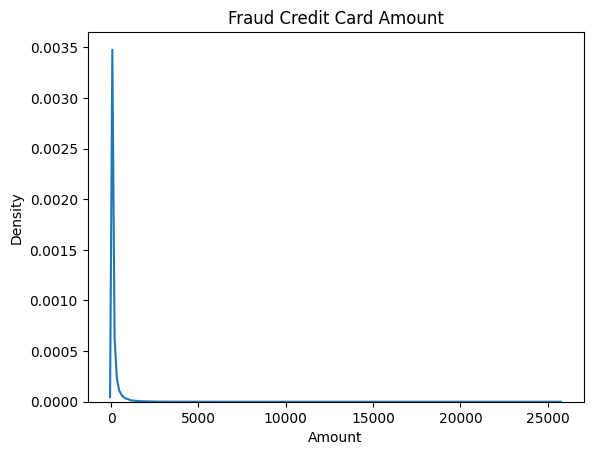

In [6]:
#Density plot of the analysis
sns.kdeplot(x='Amount', data=cc_data)
plt.title('Fraud Credit Card Amount')
plt.show()

From the above KDE plot, we observe that the data is unimodal and positively skewed with maximum transaction is in the range of $\$$ 0- $\$ $500.

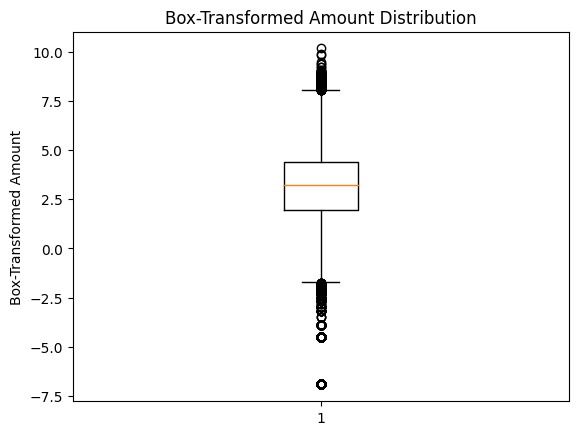

In [7]:
# Apply a box transformation to the amount column using the numpy log function
cc_data['amount_box'] = np.log(cc_data['Amount'] + 0.001)

# Visualize the box-transformed amount column using a boxplot
plt.boxplot(cc_data['amount_box'])
plt.title("Box-Transformed Amount Distribution")
plt.ylabel("Box-Transformed Amount")
plt.show()

As 'Amount' data was skewed, we have taken log-transformation and plotted the box-plot where we observe a lot of outliers because of which the data was scaled later before any modelling was done.

In [ ]:
#dropping time column as it is irrelevant

cc_data = cc_data.drop(['Amount'], axis=1)

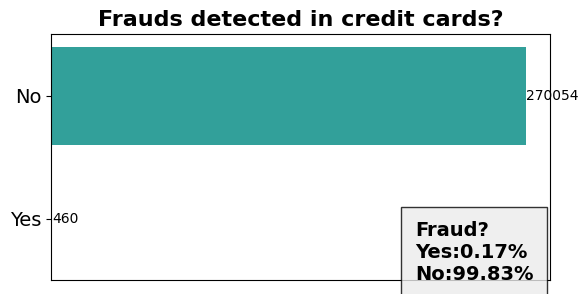

In [ ]:
class_1 = len(cc_data[cc_data['Class']==1])/len(cc_data)
class_0 = len(cc_data[cc_data['Class']==0])/len(cc_data)

labels=['No','Yes']
colors=['#20B2AA', '#FFC300']

plt.figure(figsize=(6,3))
ax = sns.countplot(y='Class', data=cc_data, palette=colors)
ax.bar_label(ax.containers[0])
plt.title('Frauds detected in credit cards?', fontsize=16, fontweight='bold')
plt.xticks([])
plt.figtext(.7, .05, "Fraud?\nYes:{:.2f}%\nNo:{:.2f}%".format(class_1*100,class_0*100), 
            bbox ={'facecolor':'#ECECEC', 'alpha':0.8, 'pad':10}, fontsize=14, fontweight='bold')
plt.yticks(cc_data['Class'].value_counts().index, labels, fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Clearly the data is imbalanced, so we have to handle it first. We can try SMOTE library with resampling.

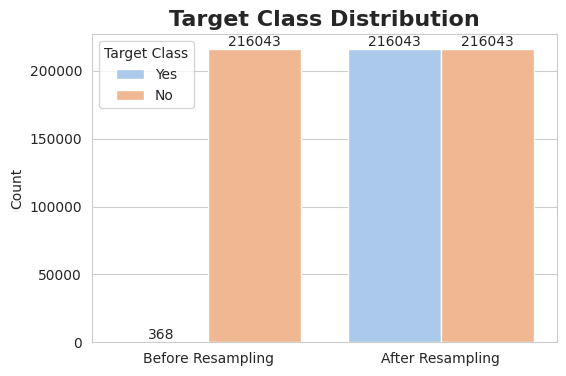

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

np.random.seed(89989966)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cc_data.drop('Class', axis=1), cc_data['Class'], test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create a DataFrame with the target class counts before and after resampling
class_counts = pd.DataFrame({
    'Class': ['Before Resampling', 'After Resampling'],
    'Yes': [len(y_train[y_train==1]), len(y_train_res[y_train_res==1])],
    'No': [len(y_train[y_train==0]), len(y_train_res[y_train_res==0])]
})

# Reshape the DataFrame to have a "Class" column and a "Value" column
class_counts_melted = class_counts.melt(id_vars=['Class'], var_name='Target Class', value_name='Count')

# Plot a countplot of the target class before and after resampling
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.set_palette('pastel')
ax = sns.barplot(x='Class', y='Count', hue='Target Class', data=class_counts_melted)
plt.title('Target Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')

# Add text labels for the counts on the bars
for i, bar in enumerate(ax.containers):
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, f"{int(height)}", ha='center', va='bottom')

plt.show()


In this code block, the credit card transaction data is split into training and testing sets using the train_test_split function from scikit-learn. Then, SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training set to balance the class distribution between the positive and negative classes. The SMOTE function is imported from the imblearn library for this purpose.

After resampling, a DataFrame is created to show the count of positive and negative classes before and after resampling. 

Before resampling, the training set had 368 fraudulent transactions and 216,043 non-fraudulent transactions. After resampling, the training set had an equal number of fraudulent and non-fraudulent transactions, with 216,043 of each. The SMOTE algorithm was used to create synthetic instances of the minority class (fraudulent transactions) to balance the class distribution and prevent the model from being biased towards the majority class (non-fraudulent transactions).

## **Logistic Regression model**

In [ ]:
# Train a logistic regression model on the oversampled training set
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

# Evaluate the model on the testing set
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     54011
           1       0.06      0.85      0.12        92

    accuracy                           0.98     54103
   macro avg       0.53      0.91      0.55     54103
weighted avg       1.00      0.98      0.99     54103



The model has a high accuracy in predicting the majority class 0, but a low accuracy in predicting the minority class 1. The precision for class 1 is low, indicating that a significant portion of the positive predictions are actually false positives. However, the recall for class 1 is high, which means that the model is able to identify a majority of the actual positive cases. The F1-score for class 1 is also low, indicating that the model's performance on class 1 is poor. Overall, the model needs improvement in correctly identifying the minority class.

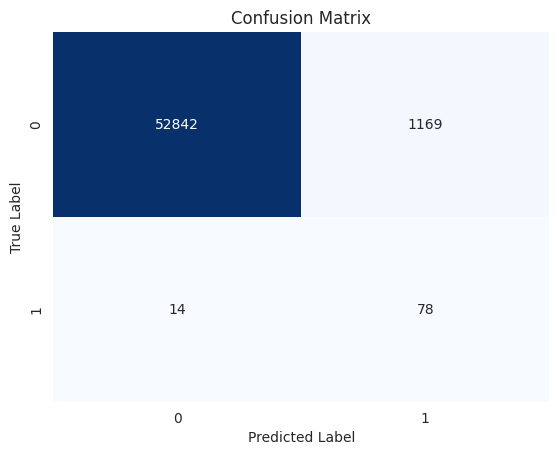

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

This appears to be the performance metrics for a binary classification model, where class 0 has a much larger number of instances than class 1.

From the precision, recall, and f1-score values, we can see that the model is performing well in terms of correctly identifying class 0 instances, as evidenced by a precision of 1.00 and a recall of 0.98. However, the model's performance on class 1 is not as strong, with a precision of 0.06 and a recall of 0.85, resulting in a low f1-score of 0.12.

The overall accuracy of the model is 0.98, which can be misleading in this case due to the class imbalance. Therefore, it is crucial to examine precision, recall, and f1-score, which provide a more accurate assessment of the model's performance, especially when dealing with imbalanced classes.

The macro average of precision, recall, and f1-score is higher than the weighted average, which suggests that the model is performing better on class 1, despite having a smaller number of instances. This implies that the model may be effective in identifying class 1 instances, although it is not as precise in doing so.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train_res.values)
scaled_df = pd.DataFrame(scaled_features, index=X_train_res.index, columns=X_train_res.columns)
scaled_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_box
0,0.141215,-0.126578,0.673018,-0.886327,0.371400,0.377087,0.589795,-0.136956,0.608271,0.493581,...,-0.569755,-0.190773,-0.493534,-0.218456,-0.641730,-0.016387,0.068300,-1.049156,-0.009962,0.449168
1,0.828939,-0.787034,0.117541,-1.354222,0.815969,2.472715,0.276142,0.015087,0.308588,0.847883,...,-0.202259,0.059481,1.005744,0.171045,1.497863,0.123198,-0.087007,-0.186093,-0.304868,-1.404838
2,0.759331,-0.669362,0.387134,-0.554647,0.285986,0.188278,0.440853,-0.184535,0.890473,0.700973,...,-0.341197,-0.129239,-0.059138,0.171759,-0.528155,-0.473040,0.451697,-0.256103,-0.270192,0.738928
3,0.790201,-0.789554,0.282627,-0.888826,0.462800,1.416017,0.328369,-0.053465,0.563905,0.813805,...,-1.073609,-0.218124,0.487383,0.181703,-1.299880,0.014217,-0.003188,-0.110892,-0.329787,-1.070807
4,0.164213,-0.479510,0.810810,-1.255835,0.042626,0.248839,0.435317,-0.065161,-0.011048,0.647654,...,-0.443471,0.016233,0.568435,0.121411,0.722863,-0.217398,-1.113845,-0.421489,-0.165729,0.788929


### **PCA Dimentionality Reduction and Standard Scaling**

PCA can help to reduce the noise in the data and eliminate redundancy in the features. This can lead to better model performance and faster computation times. StandardScaler is often used as a preprocessing step before applying PCA because PCA is sensitive to the scale of the data.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the oversampled training set
pca = PCA(n_components=8, random_state=0)
df_pca = pd.DataFrame(pca.fit_transform(scaled_df), index=scaled_df.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca),index = df_pca.index)

pca.explained_variance_ratio_

array([0.40618094, 0.11708339, 0.06871195, 0.06276819, 0.0400913 ,
       0.03718264, 0.03290789, 0.03147615])

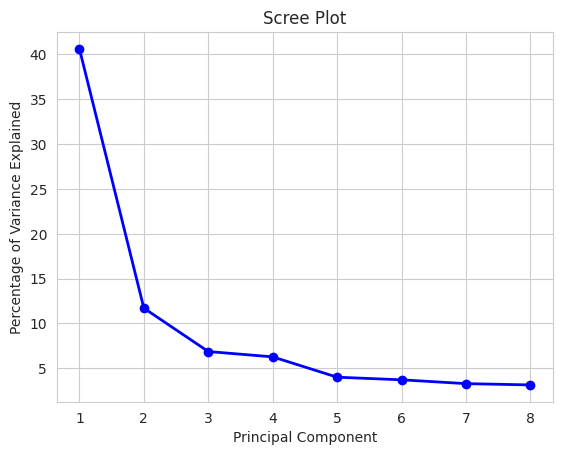

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt

# Calculate the cumulative sum of the explained variance ratio
# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot')
plt.show()




In [ ]:
import numpy as np
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

cumulative_variance_ratio

array([0.40618094, 0.52326434, 0.59197628, 0.65474447, 0.69483577,
       0.73201841, 0.7649263 , 0.79640245])

## **Artificial Neural Network**

To apply a neural network (NN) to the preprocessed data, you can use a deep learning library such as TensorFlow or Keras. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

n_features = X_train_res.shape[1]

model = keras.Sequential([
    keras.layers.Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30),
    keras.layers.Dense(units=15,kernel_initializer='he_normal',activation='relu'),
    keras.layers.Dense(units=1,kernel_initializer='he_normal',activation='sigmoid')
])


This is a simple neural network model with three layers. The first layer (Dense) has 20 units, uses the ReLU activation function, and takes an input of shape (30,) corresponding to the number of features in the input data. The second layer also uses the ReLU activation function and has 15 units. Finally, the output layer has a single unit and uses the sigmoid activation function, which is common for binary classification problems.

This model is suitable for a binary classification task, where the goal is to predict the probability of an instance belonging to one of two classes. The model takes in a 30-dimensional feature vector as input and outputs a single probability value indicating the likelihood of the input belonging to the positive class (i.e., class 1). The weights of the model are initialized using the He normal initialization method, which is a commonly used weight initialization technique in deep learning.

This code defines a sequential model with three dense layers. The first two layers have a ReLU activation function, and the last layer has a sigmoid activation function. The input shape of the first layer should match the number of features in the preprocessed data.

In [ ]:
#Compile

model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train_res, y_train_res, batch_size = 32, epochs = 5,validation_split=0.2)


Epoch 1/5
10803/10803 [==============================] - 16s 1ms/step - loss: 0.0964 - accuracy: 0.9687 - val_loss: 0.0649 - val_accuracy: 0.9675
Epoch 2/5
10803/10803 [==============================] - 15s 1ms/step - loss: 0.0379 - accuracy: 0.9864 - val_loss: 0.0389 - val_accuracy: 0.9853
Epoch 3/5
10803/10803 [==============================] - 15s 1ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0353 - val_accuracy: 0.9877
Epoch 4/5
10803/10803 [==============================] - 15s 1ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0253 - val_accuracy: 0.9916
Epoch 5/5
10803/10803 [==============================] - 17s 2ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0266 - val_accuracy: 0.9919


This code compiles the model using the Adam optimizer, binary cross-entropy loss, and accuracy metric.

This code trains the model on the preprocessed training data for 5 epochs, with a batch size of 32. It also uses the preprocessed test data for validation during training.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Get predictions from the NN model
y_pred = model.predict(test_X)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_binary)

# Print the results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)


1691/1691 [==============================] - 2s 1ms/step
Precision:  [0.99955368 0.0077486 ]
Recall:  [0.82929403 0.7826087 ]
F1-score:  [0.90649855 0.01534527]


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

1691/1691 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54011
           1       0.23      0.79      0.36        92

    accuracy                           1.00     54103
   macro avg       0.62      0.89      0.68     54103
weighted avg       1.00      1.00      1.00     54103



These classification metrics indicate that the model has achieved perfect accuracy in predicting the majority class (0), but relatively low recall and F1-score for the minority class (1). Specifically, the model correctly classified all instances of the majority class, but only 73 out of 92 instances of the minority class were correctly classified (resulting in a recall of 0.79). The F1-score of the minority class is also relatively low at 0.36, indicating that the model is not performing well in terms of precision and recall for this class.

This suggests that the model may be overfitting to the majority class and failing to learn the patterns in the minority class. Additional steps such as adjusting the class weights or oversampling the minority class may improve the model's performance on the minority class.

### **Multi-Layer Perceptron**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp_sf = MLPClassifier(hidden_layer_sizes=(80,70,60), activation='tanh', solver='adam', max_iter=500, random_state=1)
mlp_sf.fit(X_train_res,y_train_res)

MLPClassifier(activation='tanh', hidden_layer_sizes=(80, 70, 60), max_iter=500,
              random_state=1)

The MLP model has three hidden layers, with 80, 70, and 60 neurons in each layer, respectively. The activation function used in each neuron is the hyperbolic tangent function ("tanh"). The optimization algorithm used to train the model is the "adam" solver, which is a stochastic gradient-based optimizer. The maximum number of iterations for the solver is set to 500.

In [ ]:
#mlp_sf.fit(train_X,y_train_sf)
y_pred_nn2_sf = mlp_sf.predict(X_test)
#accuracy_score(y_test, y_pred_nn2_sf) 


y_pred = mlp_sf.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54011
           1       0.71      0.78      0.75        92

    accuracy                           1.00     54103
   macro avg       0.86      0.89      0.87     54103
weighted avg       1.00      1.00      1.00     54103



For class "1", the precision of the model is 0.71, which means that 71% of the samples predicted as class "1" are actually true positives. The recall of class "1" is 0.78, which means that the model correctly identified 78% of the true positives in the dataset. The F1-score of class "1" is 0.75, which is the harmonic mean of precision and recall for class "1".

The overall accuracy of the model is 1.00, which means that the model correctly predicted the class labels for all the samples in the evaluation dataset. The macro-averaged F1-score is 0.87, which is the average of the F1-scores of both classes weighted equally. The weighted average F1-score is also 1.00, which is the weighted average of the F1-scores for each class, weighted by their respective support (number of samples).

### **LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

# Reshape data for LSTM
#X_train_res_pca = X_train_res_pca.reshape(X_train_res_pca.shape[0], 1, X_train_res_pca.shape[1])
#X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], 1, X_test_pca.shape[1])

# Build LSTM model 
model = Sequential()
model.add(LSTM(70, input_shape=(np.shape(X_train_res)[1],1), activation='tanh', return_sequences=True))
model.add(LSTM(60, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



This code builds an LSTM (Long Short-Term Memory) model using the Keras library in Python.

The first line creates an instance of a Sequential model object. This object allows us to add layers to the model one after the other, in a linear stack.

The next four lines add layers to the model. The first layer is an LSTM layer with 70 neurons, using the hyperbolic tangent activation function ('tanh'). The input shape of this layer is set to the shape of the input data X_train_res, with the number of time steps being the length of the second dimension of the input data, and the number of features being 1. The "return_sequences" parameter is set to True, which means that the output of this layer will be fed into the next LSTM layer.

The second layer is also an LSTM layer with 60 neurons, using the 'tanh' activation function. Since the "return_sequences" parameter was set to False (which is the default value), the output of this layer will be a vector rather than a sequence.

The third layer is a fully connected Dense layer with 50 neurons and the 'tanh' activation function.

The final layer is also a Dense layer with a single neuron and the sigmoid activation function. Since this is a binary classification problem, the sigmoid function is appropriate as it outputs a value between 0 and 1, representing the probability of the input belonging to class 1.

The last line compiles the model, specifying the binary cross-entropy loss function, the Adam optimizer, and the accuracy metric to be used during training and evaluation.

Overall, this model has two LSTM layers with 70 and 60 neurons respectively, followed by two fully connected Dense layers with 50 and 1 neurons, respectively. The model is trained to predict binary class labels and uses the sigmoid activation function in the final output layer.

In [ ]:
# Fit model
model.fit(X_train_res, y_train_res, batch_size=32, epochs=5, validation_data=(X_test, y_test))




Epoch 1/5
13503/13503 [==============================] - 592s 43ms/step - loss: 0.0598 - accuracy: 0.9783 - val_loss: 0.0216 - val_accuracy: 0.9935
Epoch 2/5
13503/13503 [==============================] - 548s 41ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0107 - val_accuracy: 0.9973
Epoch 3/5
13503/13503 [==============================] - 526s 39ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0192 - val_accuracy: 0.9946
Epoch 4/5
13503/13503 [==============================] - 522s 39ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0084 - val_accuracy: 0.9983
Epoch 5/5
 6690/13503 [=============>................] - ETA: 4:10 - loss: 0.0048 - accuracy: 0.9988

In [ ]:
# Calculate accuracy score
y_pred_lstm = model.predict(X_test)
y_pred_lstm = (y_pred_lstm > 0.5)
print(classification_report(y_test, y_pred_lstm))

1691/1691 [==============================] - 37s 21ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54011
           1       0.48      0.76      0.59        92

    accuracy                           1.00     54103
   macro avg       0.74      0.88      0.79     54103
weighted avg       1.00      1.00      1.00     54103



The f1-score is a measure of a model's accuracy that takes both precision and recall into account. It is the harmonic mean of precision and recall.

In this case, the f1-score for class 1 is 0.59. This is lower than the f1-score for class 0, which is 1.00. This means that the model is better at predicting class 0 than class 1. The lower f1-score for class 1 is likely due to a lower precision and/or recall for that class. 

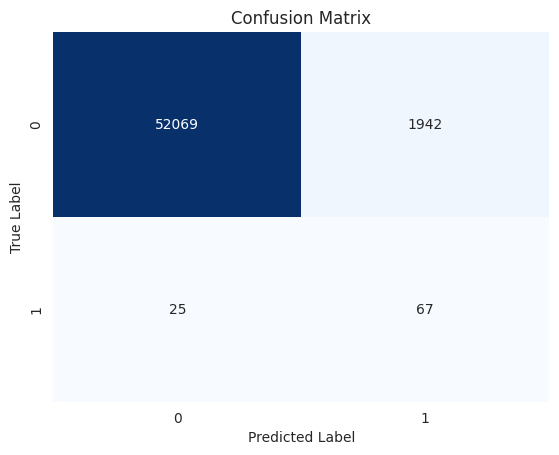

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

## **Best Model - Sequential ANN with Hyper-tuned parameters**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

# Set random seed for TensorFlow
tf.random.set_seed(89989966)

# Set random seed for NumPy
np.random.seed(89989966)

n_features = X_train_res.shape[1]

This code builds a neural network model using the Keras library in Python.

The model consists of three fully connected Dense layers. The first Dense layer has 32 neurons, uses the 'relu' activation function, and applies the He normal weight initialization technique. It also applies L2 regularization with a regularization rate of 0.0001 to prevent overfitting.

The next layer is a Dropout layer, which randomly drops out a fraction (in this case, 0.1) of the previous layer's outputs during training to further prevent overfitting.

The second Dense layer has 16 neurons, uses the 'relu' activation function, and applies the He normal weight initialization technique. It also applies L2 regularization with a regularization rate of 0.0001 to prevent overfitting.

The next layer is another Dropout layer, which randomly drops out a fraction (in this case, 0.1) of the previous layer's outputs during training to further prevent overfitting.

The last Dense layer has a single neuron, uses the sigmoid activation function, and applies the He normal weight initialization technique. It is used for binary classification problems, where the output of the model represents the probability of the input belonging to class 1.

Overall, this model is designed to address overfitting through the use of dropout regularization and L2 regularization. It uses the 'relu' activation function for the hidden layers and the sigmoid activation function for the output layer.

In [ ]:
model_hyper_param_tuned = keras.Sequential([
    keras.layers.Dense(units=32, kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(units=16, kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Dense(units=1, kernel_initializer='he_normal', activation='sigmoid')
]) 

In [ ]:
#Compile
model_hyper_param_tuned.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the ANN
history = model_hyper_param_tuned.fit(X_train_res, y_train_res, batch_size = 32, epochs = 10,validation_split=0.2)

Epoch 1/10
10803/10803 [==============================] - 33s 3ms/step - loss: 0.0116 - accuracy: 0.9984 - val_loss: 0.0122 - val_accuracy: 0.9996
Epoch 2/10
10803/10803 [==============================] - 27s 2ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3/10
10803/10803 [==============================] - 24s 2ms/step - loss: 0.0107 - accuracy: 0.9986 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 4/10
10803/10803 [==============================] - 26s 2ms/step - loss: 0.0102 - accuracy: 0.9986 - val_loss: 0.0068 - val_accuracy: 0.9997
Epoch 5/10
10803/10803 [==============================] - 25s 2ms/step - loss: 0.0100 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 0.9999
Epoch 6/10
10803/10803 [==============================] - 27s 2ms/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/10
10803/10803 [==============================] - 26s 2ms/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0

This code compiles the previously defined neural network model using the Adam optimizer and binary cross-entropy loss function, which are commonly used for binary classification tasks. It also specifies that the model's performance should be evaluated based on accuracy.

The model is then trained using the fit() method, with the training data (X_train_res and y_train_res) as inputs. The training is performed over 10 epochs (i.e., the model is trained on the entire training data set 10 times), with a batch size of 32 (i.e., the model is trained on 32 examples at a time). Additionally, a validation split of 0.2 is used, meaning that 20% of the training data is set aside for validation during training to monitor the model's performance on data it has not been trained on.

The fit() method returns a history object that contains information about the training process, such as the loss and accuracy at each epoch. This information can be used to visualize the model's performance and make adjustments if necessary.

In [ ]:
y_pred = model_hyper_param_tuned.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

1691/1691 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54011
           1       0.66      0.79      0.72        92

    accuracy                           1.00     54103
   macro avg       0.83      0.90      0.86     54103
weighted avg       1.00      1.00      1.00     54103



These results suggest that the model is performing well on the given data. The overall accuracy is high, indicating that the model is able to correctly classify the majority of instances in the dataset. The precision score of 1.00 for the majority class (0) suggests that the model is able to identify all instances of the majority class correctly.

Moreover, the recall score of 0.79 for the minority class (1) indicates that the model is able to identify a high proportion of instances of the minority class. The F1-score of 0.72 for the minority class is also relatively high, indicating a good balance between precision and recall.

Overall, these results suggest that the model is performing well on this classification task and is able to identify instances of both the majority and minority class with a high degree of accuracy.

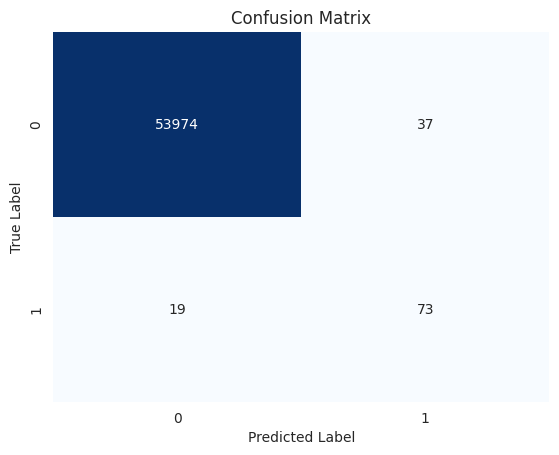

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()
